# Project Overview

This dataset provides insights into customer satisfaction levels within an undisclosed airline company. The optimal goal is to examine the quality and satisfaction rates in this database.

The following are some questions to guide the analysis of this rich dataset:

**Questions to answer:**

1. Satisfaction:
    - Class -TMX
    - Entertainment - HYM
    - Distance - HYM
    - Delays
    - Food - TMX
  
Focus: during flight

# 1. Importing Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Reading the csv file

In [2]:
df = pd.read_csv(r"Airline_customer_satisfaction.csv")
df = df.sample(300)

# 3. EDA

In [3]:
df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
113920,satisfied,Loyal Customer,25,Business travel,Business,3338,2,2,2,2,...,5,5,4,4,5,3,4,5,0,0.0
106609,dissatisfied,Loyal Customer,35,Business travel,Business,255,4,1,3,3,...,4,4,4,4,4,4,4,3,0,0.0
44444,dissatisfied,disloyal Customer,23,Business travel,Eco,1295,1,5,1,3,...,5,2,4,1,2,3,1,2,3,0.0
50005,dissatisfied,disloyal Customer,25,Business travel,Business,1531,2,4,2,3,...,3,3,5,5,5,5,4,3,0,0.0
51202,dissatisfied,disloyal Customer,32,Business travel,Eco,2114,3,0,4,4,...,3,3,1,1,5,2,4,3,0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 113920 to 122220
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   satisfaction                       300 non-null    object 
 1   Customer Type                      300 non-null    object 
 2   Age                                300 non-null    int64  
 3   Type of Travel                     300 non-null    object 
 4   Class                              300 non-null    object 
 5   Flight Distance                    300 non-null    int64  
 6   Seat comfort                       300 non-null    int64  
 7   Departure/Arrival time convenient  300 non-null    int64  
 8   Food and drink                     300 non-null    int64  
 9   Gate location                      300 non-null    int64  
 10  Inflight wifi service              300 non-null    int64  
 11  Inflight entertainment             300 non-null    int6

In [5]:
df.shape

(300, 22)

In [6]:
df.describe().round()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0
mean,38.0,2015.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,4.0,3.0,15.0,15.0
std,16.0,1059.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,39.0,40.0
min,7.0,54.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
25%,25.0,1390.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,3.0,2.0,3.0,2.0,3.0,3.0,0.0,0.0
50%,39.0,1942.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,0.0,0.0
75%,50.0,2576.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,10.0,10.0
max,80.0,5418.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,340.0,338.0


# 4. Data cleaning

In [7]:
# removing unwanted features
df.drop(["Departure/Arrival time convenient", 
         "Gate location", 
         "Online support", 
         "Ease of Online booking", 
         "On-board service", 
         "Baggage handling", 
         "Checkin service", 
         "Online boarding", 
         "Arrival Delay in Minutes"], 
        axis=1, inplace=True)

# Flight distance and satisfaction analysis

In [8]:
filtered_df = df[["satisfaction","Flight Distance"]].set_index("satisfaction")

In [9]:
filtered_df

,Flight Distance
satisfaction,
satisfied,3338
dissatisfied,255
dissatisfied,1295
dissatisfied,1531
dissatisfied,2114
...,...
dissatisfied,4412
satisfied,2096
dissatisfied,3226


In [10]:
df["Flight Distance"].dtype

dtype('int64')

In [11]:
df["Flight Distance"].value_counts()

Flight Distance
1497    2
2400    2
2114    2
1491    2
2096    2
       ..
336     1
234     1
226     1
1246    1
1885    1
Name: count, Length: 290, dtype: int64

<Axes: xlabel='satisfaction', ylabel='Flight Distance'>

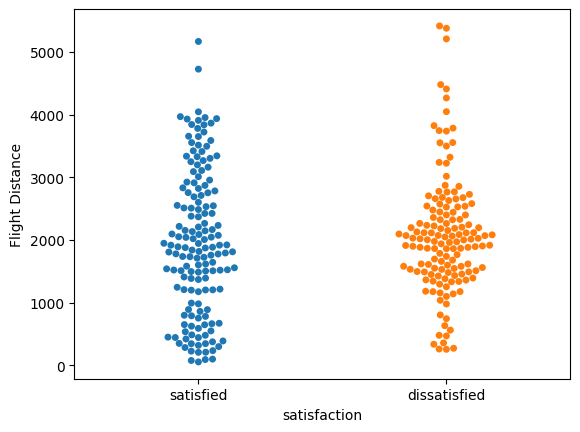

In [12]:
sns.swarmplot(data=df, y="Flight Distance", x="satisfaction", hue="satisfaction")

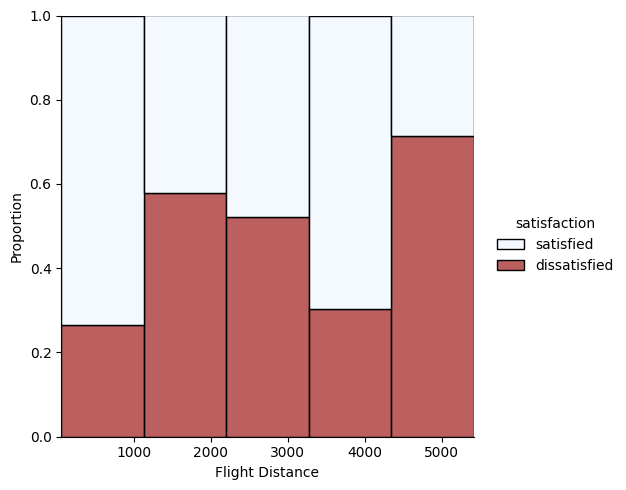

In [47]:
plot1 = sns.displot(
    data = df,
    x="Flight Distance", 
    hue="satisfaction",
    multiple="fill",
    palette=["AliceBlue", "Brown"],
    bins = 5,
)

plot1.set_axis_labels(y_var="Proportion")